# M2608.002900 기계학습 기초 <br> Assignment 1: Logistic Regression

# Setup
Check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn 0.20 or later is installed.

In [2]:
# Install required library (might take a while)
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Python >=3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >=0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Dataset load & Plot

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

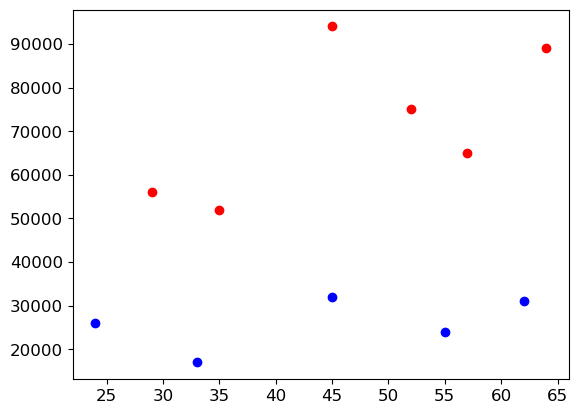

In [5]:
data = np.loadtxt('data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]
label_mask = np.equal(y, 1)

plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')
plt.show()

## Problem 0-1. sklearn model로 Logistic Regression 모델 train 시켜보기
scikit-learn library의 LogisticRegression 클래스를 이용해 train 시켜 보세요. <br>
클래스 인자 및 사용법에 관한 자세한 설명은 scikit-learn 홈페이지의 설명을 참고해 주세요. <br>
(참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

코드 구현에 LLM(Chat-GPT, Gemini, GROK 등)을 보조 도구로 활용하여도 됩니다.

In [6]:
def learn_and_return_weights(X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, float]:
    from sklearn.linear_model import LogisticRegression
    # YOUR CODE COMES HERE
    # w: coefficient of the model to input features,
    # b: bias of the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)
    w = model.coef_[0]
    b = model.intercept_[0] 
    return w, b

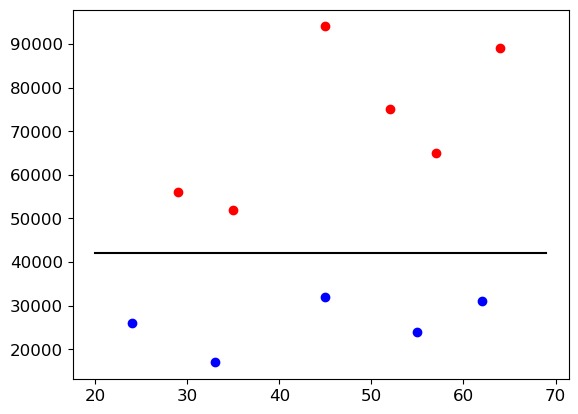

In [7]:
def plot_data_and_weights(X, y, w, b):
    plt.scatter(X[:, 0][label_mask], X[:, 1][label_mask], color='red')
    plt.scatter(X[:, 0][~label_mask], X[:, 1][~label_mask], color='blue')

    x_lin = np.arange(20, 70)
    y_lin = -(b + w[0] * x_lin) / w[1]

    plt.plot(x_lin, y_lin, color='black');
    plt.show()

w, b = learn_and_return_weights(X, y)
plot_data_and_weights(X, y, w, b)

## Problem 0-2. numpy로 Logistic Regression 구현해보기
scikit-learn library를 사용하지 않고 numpy를 활용하여 Logistic Regression을 구현해보세요.

코드 구현에 LLM(Chat-GPT, Gemini, GROK 등)을 보조 도구로 활용하여도 됩니다.

In [8]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    # YOUR CODE COMES HERE
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_pred: np.ndarray, target: np.ndarray) -> float:
    # YOUR CODE COMES HERE
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(target * np.log(y_pred) + (1 - target) * np.log(1 - y_pred))
    return loss

def learn_and_return_weights_numpy(X: np.ndarray, Y: np.ndarray, lr: float = 0.01, iter: int = 100000) -> tuple[np.ndarray, float]:
    # YOUR CODE COMES HERE
    # w: coefficient of the model to input features,
    # b: bias of the model
    m, n = X.shape
    W = np.zeros(n)
    b = 0.0

    for i in range(iter):
        z = np.dot(X, W) + b
        y_pred = sigmoid(z)

        # Compute gradients
        dw = np.dot(X.T, (y_pred - Y)) / m
        db = np.mean(y_pred - Y)

        # Update weights
        W -= lr * dw
        b -= lr * db
    return W, b
    return W, b

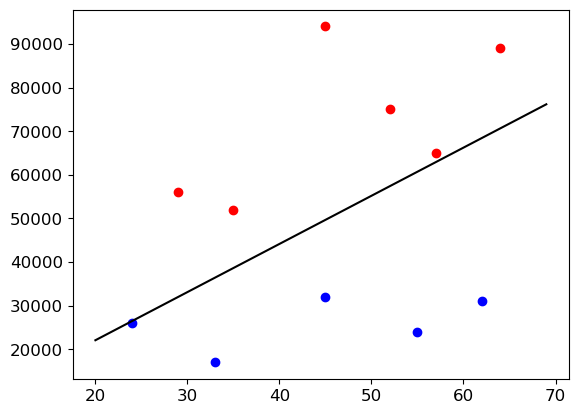

Binary cross entropy loss: 9.992007221626413e-16


In [9]:
w, b = 0, 0
w, b = learn_and_return_weights_numpy(X, y)
plot_data_and_weights(X, y, w, b)

z = np.dot(X, w) + b
y_output = sigmoid(z)
bce = binary_cross_entropy_loss(y_output,y)
if np.isnan(bce) == True:
    print('You need to make sure your binary cross entropy loss function is correct,\nor add a small number (e.g. 1e-10) to the argument of the logarithm to make sure the argument of the logarithm is not zero.')
else:
    print('Binary cross entropy loss:', bce)

## Problem 1-1. Logistic Regression으로 multi-class classification 하기: API 활용하기
scikit-learn library의 Logistic Regression API를 활용하면 multi-class classification을 간단하게 수행할 수 있습니다.<br>
MNIST dataset에 대해 multi-class classification을 위한 Logistic Regression 모델을 학습시키고, test data에 대한 accuracy를 계산해 보세요.

**2개 이상의 LLM을 활용하여 코드를 구현하고, 구현 결과를 비교 분석하여 보고서에 작성하세요.**

In [10]:
def get_dataset():
    from torchvision.datasets import MNIST
    train_data = MNIST(root = './data', train=True, download=True)
    test_data = MNIST(root = './data', train=False, download=True)
    x_train = train_data.data.numpy()
    y_train = train_data.targets.numpy()
    x_test = test_data.data.numpy()
    y_test = test_data.targets.numpy()
    x_train = x_train.reshape((-1, 28 * 28)).astype(np.float32)
    x_test = x_test.reshape((-1, 28 * 28)).astype(np.float32)
    return (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = get_dataset()

num_classes = 10

In [11]:
def learn_mul(X: np.ndarray, y: np.ndarray) -> LogisticRegression:
    ################# YOUR CODE COMES HERE ######################
    # training and return the multi-class logistic model
    
    # Initialize the logistic regression model
    # Using 'multinomial' solver for multi-class problems
    # 'lbfgs' is an optimization algorithm that works well for multi-class logistic regression
    lr = LogisticRegression(
        multi_class='multinomial',  # Use multinomial for true multi-class
        solver='lbfgs',             # Efficient optimizer for multinomial LR
        max_iter=1000,              # Increase max iterations for convergence
        C=1.0,                      # Regularization strength (inverse)
        random_state=42             # For reproducibility
    )
    
    # Train the model on the input data
    lr.fit(X, y)
    #############################################################
    return lr

def inference_mul(x: np.ndarray, lr_model: LogisticRegression) -> np.ndarray:
    ################# YOUR CODE COMES HERE ######################
    # inference model and return predicted y values
    
    # Use the trained model to predict class labels
    y_pred = lr_model.predict(x)
    
    # Alternative: If you need probabilities instead of class labels
    # y_pred_proba = lr_model.predict_proba(x)
    
    #############################################################
    return y_pred

In [12]:
model = learn_mul(x_train, y_train)
preds = inference_mul(x_test, model)
accuracy = np.sum(preds == y_test) / y_test.shape[0]
print('Accuracy:', accuracy)

Accuracy: 0.9214


## Problem 1-2. Logistic Regression으로 multi-class classification 하기: Transformation to Binary

Logistic Regression은 기본적으로 binary classifier 입니다. 즉, input *X*를 2개의 class로 밖에 분류하지 못합니다.<br>
하지만, 이같은 Logistic Regression 모델을 연달아 사용한다면 data를 여러 class로 분류할 수도 있습니다.<br>
(참고: https://en.wikipedia.org/wiki/Multiclass_classification#Transformation_to_binary)

MNIST dataset을 이용하여 (class 수) 개의 Binary classifier (Logistic Regression)를 'lrs'의 각 원소에 저장한 뒤,<br>
학습시킨 모델들을 이용하여 test data에 대한 accuracy를 계산해 보세요.<br>
(각 모델의 training iteration은 10회면 충분합니다.)

**2개 이상의 LLM을 활용하여 코드를 구현하고, 구현 결과를 비교 분석하여 보고서에 작성하세요.**

In [13]:
def learn_mul2bin(X: np.ndarray, y: np.ndarray, num_classes: int) -> list[LogisticRegression]:
    lrs = []
    ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n/10%10!=1)*(n%10<4)*n%10::4])
    for i in range(num_classes):
        print('training %s classifier'%(ordinal(i+1)))
        ################# YOUR CODE COMES HERE ######################
        # training and return the multi-class logistic model

        #############################################################
        
        # training and return the multi-class logistic model
        
        # Create binary labels for class i (1 for class i, 0 for all other classes)
        y_binary = (y == i).astype(int)
        
        # Create and train a binary logistic regression model
        lr = LogisticRegression(
            solver='liblinear',  # Efficient for binary classification
            C=1.0,               # Regularization strength (inverse)
            max_iter=1000,       # Increase iterations for better convergence
            random_state=42      # For reproducibility
        )
        
        # Train the model
        lr.fit(X, y_binary)
        
        # Add the trained model to our list
        lrs.append(lr)

    return lrs

def inference_mul2bin(X: np.ndarray, lrs: list[LogisticRegression]) -> int:
    ################# YOUR CODE COMES HERE ######################
    # inference model and return predicted y values

    #############################################################
    
    # X is a single sample in this case (from the usage context)
    # Reshape it to ensure it's 2D for sklearn (1 sample, n_features)
    if X.ndim == 1:
        X = X.reshape(1, -1)
        
    # Get probability scores for each binary classifier
    scores = []
    for lr in lrs:
        # Get probability of the positive class (class 1)
        # predict_proba returns [[prob_class0, prob_class1]]
        score = lr.predict_proba(X)[0, 1]
        scores.append(score)
    
    # Return the class with the highest probability
    y_pred = np.argmax(scores)
    
    return y_pred

In [14]:
num_classes = 10

models = learn_mul2bin(x_train, y_train, num_classes)
preds = np.array([inference_mul2bin(x, models) for x in x_test])
accuracy = np.sum(preds == y_test) / y_test.shape[0]
print('Accuracy:', accuracy)

training 1st classifier
training 2nd classifier
training 3rd classifier
training 4th classifier
training 5th classifier
training 6th classifier
training 7th classifier
training 8th classifier
training 9th classifier
training 10th classifier
Accuracy: 0.9177


## Problem 2. Logistic Regression을 활용한 임의의 데이터셋 분류 실습

**이번 문제에서는 seaborn 라이브러리의 titanic dataset을 활용하여 분류를 실습해볼 것입니다.** titanic dataset은 1912년 타이타닉 호 침몰 사고 당시 승객들의 정보를 담고 있으며, 생존 여부를 비롯한 다양한 특성으로 구성된 데이터셋입니다. 해당 데이터셋에 존재하는 승객들의 다양한 특성들을 활용하여 승객의 생존 여부를 logistic regression 알고리즘으로 분류하는 실습을 진행해보겠습니다.

자세히 설명하자면, 승객의 성별(sex), 나이(age), 탑승 요금(fare), 객실 등급(class), 함께 탑승한 가족 구성원 수(sibsp, parch), 탑승한 도시(embark_town), 혼자 탑승했는 지 여부(alone)을 활용하여 생존 여부(survived)를 예측합니다.  
데이터셋에 대한 추가적인 설명은 아래 링크를 참조하세요.   
(참고: https://www.kaggle.com/c/titanic/data)

앞의 실습 내용들을 참고하여 numpy로 여러 변수에 대한 logistic regression을 구현하세요.  
LLM을 도구로 활용하여 구현하여도 괜찮습니다.  

**※ 수업 시간에 배운 logistic regression의 성능을 올리기 위한 여러 방식들을 활용하여 최대한 성능을 높여보세요.**  
(ex. L1, L2 regularization, polynomial features 등)

In [15]:
################################### Dataset Preprocessing #############################################
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = sns.load_dataset('titanic')

# 데이터 확인
print(df.head())

df = df[['sex', 'age', 'fare', 'class', 'sibsp', 'parch', 'embark_town', 'alone', 'survived']].dropna()

# 범주형 데이터 인코딩
df['sex'] = df['sex'].map({'male': 0, 'female': 1})   # 성별 숫자로 변환
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})  # 좌석 등급 숫자로 변환
df['alone'] = df['alone'].astype(int)  # 혼자 탑승 여부 (Boolean → int 변환)

# 원핫 인코딩 (탑승 도시)
df = pd.get_dummies(df, columns=['embark_town'], drop_first=True)

X = df.drop(columns=['survived'])
y = df['survived']

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, ): # <<< You can add your own input parameters
        ################# YOUR CODE COMES HERE ######################
        # initialize class member variable

        #############################################################

    def sigmoid(self, z):
        # YOUR CODE COMES HERE
        return

    def fit(self, X, y):
        ################# YOUR CODE COMES HERE ######################
        # training model here

        #############################################################
        return

    def predict(self, X):
        ################# YOUR CODE COMES HERE ######################
        # return predicted y

        #############################################################
        return

    # You can add your own member functions

model = LogisticRegression( ) ##### ADD YOUR OWN INPUT PARAMETERS

# 모델 학습 및 예측
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")
